In [1]:
from numbers import Number
import numpy as np


class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"Point(x={self.x}, y={self.y})"

    def __repr__(self):
        return self.__str__()

    def __hash__(self):
        # Hash based on the tuple (x, y)
        return hash((self.x, self.y))

    def __eq__(self, other):
        if not isinstance(other, Point):
            return False
        return self.x == other.x and self.y == other.y

    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        raise IndexError(f'Point index out of range: {index}')

    def __setitem__(self, key, value):
        if key == 0:
            self.x = value
        elif key == 1:
            self.y = value
        raise IndexError(f'Point index out of range: {key}')

    # Python 3.x uses __truediv__ and __floordiv__. __div__ is 2.x-only.

    def __itruediv__(self, other):
        if isinstance(other, Point):
            self.x = self.x / other.x
            self.x = self.y / other.y
            return self
        elif isinstance(other, Number):
            self.x = self.x / other
            self.y = self.y / other
            return self
        else:
            raise ValueError("Unsupported division operation")

    def __truediv__(self, other):
        if isinstance(other, Point):
            return Point(self.x / other.x, self.y / other.y)
        elif isinstance(other, (int, float)):
            return Point(self.x / other, self.y / other)
        raise ValueError("Unsupported division operation")

    def __rtruediv__(self, other):
        return self.__truediv__(other)

    def __ifloordiv__(self, other):
        if isinstance(other, Point):
            self.x = self.x // other.x
            self.y = self.y // other.y
            return self
        elif isinstance(other, Number):
            self.x = self.x // other
            self.y = self.y // other
            return self
        else:
            raise ValueError("Unsupported floor division operation")

    def __floordiv__(self, other):
        if isinstance(other, Point):
            return Point(self.x // other.x, self.y // other.y)
        elif isinstance(other, (int, float)):
            return Point(self.x // other, self.y // other)
        raise ValueError("Unsupported floor division operation")

    def __rfloordiv__(self, other):
        return self.__floordiv__(other)

    def __isub__(self, other):
        if isinstance(other, Point):
            self.x -= other.x
            self.y -= other.y
            return self
        elif isinstance(other, Number):
            self.x -= other
            self.y -= other
            return self
        else:
            raise ValueError('Unsupported subtraction operation')

    def __sub__(self, other):
        if isinstance(other, Point):
            return Point(self.x - other.x, self.y - other.y)
        elif isinstance(other, Number):
            return Point(self.x - other, self.y - other)
        raise ValueError('Unsupported subtraction operation')

    def __rsub__(self, other):
        return self.__sub__(other)

    def __iadd__(self, other):
        if isinstance(other, Point):
            self.x += other.x
            self.y += other.y
            return self
        elif isinstance(other, Number):
            self.x += other
            self.y += other
            return self
        else:
            raise ValueError('Unsupported addition operation')

    def __add__(self, other):
        if isinstance(other, Point):
            return Point(self.x + other.x, self.y + other.y)
        elif isinstance(other, Number):
            return Point(self.x + other, self.y + other)
        raise ValueError('Unsupported addition operation')

    def __radd__(self, other):
        return self.__add__(other)

    def __imul__(self, other):
        if isinstance(other, Point):
            self.x *= other.x
            self.y *= other.y
            return self
        elif isinstance(other, Number):
            self.x *= other
            self.y *= other
            return self
        else:
            raise ValueError('Unsupported multiplication operation')

    def __mul__(self, other):
        if isinstance(other, Point):
            return Point(self.x * other.x, self.y * other.y)
        elif isinstance(other, Number):
            return Point(self.x * other, self.y * other)
        raise ValueError('Unsupported multiplication operation')

    def __rmul__(self, other):
        return self.__mul__(other)

    def __iter__(self):
        return iter([self.x, self.y])

    def distance(self, other):
        if isinstance(other, Point):
            return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
        raise ValueError('Unsupported distance operation')

    def to_dict(self):
        return {'x': self.x, 'y': self.y}

    @classmethod
    def from_dict(cls, dictionary):
        return Point(dictionary['x'], dictionary['y'])

    def to_array(self):
        return [self.x, self.y]

    def copy(self):
        return Point(self.x, self.y)
    
p = Point(10, 10)
print(p)

Point(x=10, y=10)


In [2]:
import numpy as np


class Pose:

    def __init__(self, x, y, theta):
        self.x = x
        self.y = y
        self.theta = theta

    def set_deg_theta(self, new_theta):
        self.theta = np.deg2rad(new_theta % 360)

    def __getitem__(self, item):
        if item == 0:
            return self.x
        elif item == 1:
            return self.y
        elif item == 2:
            return self.theta
        raise IndexError(f'Pose index out of range: {item}')

    def __setitem__(self, key, value):
        if key == 0:
            self.x = value
        elif key == 1:
            self.y = value
        elif key == 2:
            self.theta = value
        raise IndexError(f'Pose index out of range: {key}')

    def __iter__(self):
        return iter([self.x, self.y, self.theta])

    def __len__(self):
        return 3

    def as_point(self):
        return Point(self.x, self.y)

    def as_tuple(self):
        return self.x, self.y

    def to_dict(self):
        return {
            "x": self.x,
            "y": self.y,
            "theta": self.theta
        }

    @classmethod
    def from_dict(cls, pose_dict):
        return Pose(pose_dict["x"], pose_dict["y"], pose_dict["theta"])

    def __str__(self):
        return f"Pose(x={self.x}, y={self.y}, theta={self.theta})"

    def __repr__(self):
        return self.__str__()

    def __eq__(self, other):
        if isinstance(other, Pose):
            return self.x == other.x and self.y == other.y and self.theta == other.theta
        return False

    def copy(self):
        return Pose(self.x, self.y, self.theta)

    def distance(self, other):
        if isinstance(other, Point) or isinstance(other, Pose):
            return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
        raise ValueError(f'Unsupported distance operation between Pose (self) and {type(other)} (other)')



In [3]:
class Segment:

    def __init__(self, start, end):
        self.start = Point(start[0], start[1])
        self.end = Point(end[0], end[1])

    @property
    def bounds(self):
        min_x = min(self.start.x, self.end.x)
        max_x = max(self.start.x, self.end.x)
        min_y = min(self.start.y, self.end.y)
        max_y = max(self.start.y, self.end.y)
        return min_x, min_y, max_x, max_y

    def get_edges(self):
        return [self.copy()]

    def copy(self):
        return Segment(self.start.copy(), self.end.copy())

    def __getitem__(self, item):
        if item == 0:
            return self.start
        elif item == 1:
            return self.end
        raise IndexError(f'Segment index out of range: {item}')

    def __setitem__(self, key, value):

        if not isinstance(value, Point):
            key_name = 'start' if key == 0 else 'end'
            raise ValueError(f'Invalid {key_name} object {type(value)}; must be Point.')

        if key == 0:
            self.start = value
        elif key == 1:
            self.end = value
        raise IndexError(f'Segment index out of range: {key}')

    def __iter__(self):
        return iter([self.start, self.end])

    def midpoint(self):
        return Point((self.start.x + self.end.x) / 2, (self.start.y + self.end.y) / 2)

    def normal(self):
        """
        Compute the normal vector of the segment
        """
        return Point(-(self.end.y - self.start.y), self.end.x - self.start.x)

    def project(self, axis):
        """
        Project the segment onto an axis and return the min and max values
        """

        min_proj = min(self.start.x * axis.x + self.start.y * axis.y,
                       self.end.x * axis.x + self.end.y * axis.y)
        max_proj = max(self.start.x * axis.x + self.start.y * axis.y,
                       self.end.x * axis.x + self.end.y * axis.y)
        return min_proj, max_proj

    def closest_point(self, point):
        """
        Find the closest point on the segment to the given point
        """

        x1, y1 = self.start.x, self.start.y
        x2, y2 = self.end.x, self.end.y
        x, y = point.x, point.y

        dx = x2 - x1
        dy = y2 - y1

        t = ((x - x1) * dx + (y - y1) * dy) / (dx**2 + dy**2)

        if t < 0:
            return self.start
        elif t > 1:
            return self.end
        else:
            return Point(x1 + t * dx, y1 + t * dy)

    def __str__(self):
        return f'Segment {self.start} - {self.end}'

    def __repr__(self):
        return self.__str__()

    def __len__(self):
        return self.start.distance(self.end)


In [4]:
from abc import abstractmethod


class Shape:

    def __init__(self):

        self.pose = Pose(0, 0, 0)
        self.radius = 0

    @abstractmethod
    def get_bounds(self):
        pass

    @abstractmethod
    def translate(self, x, y):
        pass

    @abstractmethod
    def rotate(self, theta):
        pass

    @abstractmethod
    def transform(self, x, y, theta):
        pass

    @abstractmethod
    def translate_to(self, x, y):
        pass

    @abstractmethod
    def rotate_to(self, theta):
        pass

    @abstractmethod
    def transform_to(self, x, y, theta):
        pass

    @abstractmethod
    def rotate_around(self, x, y, theta):
        pass

    @abstractmethod
    def copy(self):
        pass

    @abstractmethod
    def to_dict(self):
        pass

    @classmethod
    def from_dict(cls, shape_dict):
        pass

    @abstractmethod
    def project(self, axis):
        pass

    @abstractmethod
    def get_edges(self):
        pass

    def check_nearness(self, other):
        return self.pose.distance(other.pose) <= self.radius + other.radius


In [5]:
class Polygon(Shape):

    def __init__(self, points):
        """
        :param points: a list of 2-dimensional vectors.
        """

        # Deep copy of the points array. While making the copy we can
        # find the centroid of the polygon

        self.points = []
        for point in points:
            if isinstance(point, Point):
                self.points.append(Point(point.x, point.y))  # copy it
            elif isinstance(point, tuple):
                self.points.append(Point(point[0], point[1]))
            elif isinstance(point, list):
                self.points.append(Point(point[0], point[1]))
            else:
                raise ValueError(f'Invalid object {point}')

        # Super will instantiate the pose object
        super().__init__()

        # Find the center and set pose x and y values
        self._find_center()

        # Find the enclosing radius
        self.radius = self._find_radius()

    def _find_radius(self):
        """
        Find the radius of a circle that fully encloses this polygon.
        Supposes that the center has already been found.
        """

        radius = 0
        for point in self.points:
            distance = np.sqrt((self.pose.x - point.x) ** 2 + (self.pose.y - point.y) ** 2)
            radius = max(radius, distance)

        return radius

    def _find_center(self):
        total_x = sum(point.x for point in self.points)
        total_y = sum(point.y for point in self.points)
        num_points = len(self.points)
        self.pose.x = total_x / num_points
        self.pose.y = total_y / num_points

    def get_bounds(self):
        return self.get_bounding_box()

    def to_point_array(self):
        return [[point.x, point.y] for point in self.points]

    def get_bounding_box(self):
        """
        Returns the bounding box of the polygon.
        """

        # Compute the bounding box (list of points)
        min_x = self.points[0].x
        max_x = self.points[0].x
        min_y = self.points[0].y
        max_y = self.points[0].y

        for point in self.points:
            min_x = min(min_x, point.x)
            max_x = max(max_x, point.x)
            min_y = min(min_y, point.y)
            max_y = max(max_y, point.y)

        return min_x, min_y, max_x, max_y

    def translate(self, offset_x, offset_y):

        for point in self.points:
            point.x += offset_x
            point.y += offset_y

        self.pose.x += offset_x
        self.pose.y += offset_y

    def rotate(self, angle):
        """
        Rotate around the center by the specified angle
        """

        # Apply rotation to each point
        for point in self.points:
            # Translate the point to the origin (center) of rotation
            translated_x = point.x - self.pose.x
            translated_y = point.y - self.pose.y

            # Perform the rotation
            new_x = translated_x * np.cos(angle) - translated_y * np.sin(angle)
            new_y = translated_x * np.sin(angle) + translated_y * np.cos(angle)

            # Translate the point back to its original position
            point.x = new_x + self.pose.x
            point.y = new_y + self.pose.y

    def transform(self, x, y, theta):
        self.translate(x, y)
        self.rotate(theta)

    def translate_to(self, x, y):
        offset_x = x - self.pose.x
        offset_y = y - self.pose.y
        self.translate(offset_x, offset_y)

    def rotate_to(self, target_angle):
        # Compute the angle difference
        angle_diff = target_angle - self.pose.theta
        self.rotate(angle_diff)

    def transform_to(self, x, y, theta):
        self.translate_to(x, y)
        self.rotate_to(theta)

    @classmethod
    def from_dict(cls, dictionary):

        # point_list = json.loads(dictionary['points'], object_hook=lambda d: Point(d['x'], d['y']))

        points = []
        for point_dictionary in dictionary['points']:
            points.append(Point.from_dict(point_dictionary))

        return Polygon(points)

    def to_dict(self):
        return {'points': [point.to_dict() for point in self.points]}

    def get_edges(self):
        """
        Get the edges of a polygon
        """

        edges = []
        for i in range(len(self.points)):
            edge = Segment(self.points[i], self.points[(i + 1) % len(self.points)])
            edges.append(edge)
        return edges

    def rotate_around(self, x, y, angle):
        """
        Rotate the polygon around a specified point by the specified angle (in radians).
        """

        # Apply rotation to each point
        for point in self.points:

            # Translate the point to the origin (center) of rotation
            translated_x = point.x - x
            translated_y = point.y - y

            # Perform the rotation
            new_x = translated_x * np.cos(angle) - translated_y * np.sin(angle)
            new_y = translated_x * np.sin(angle) + translated_y * np.cos(angle)

            # Translate the point back to its original position
            point.x = new_x + x
            point.y = new_y + y

        # Update the center
        self._find_center()

    def project(self, axis):
        """
        Project the polygon onto an axis and return the min and max values
        """

        min_proj = float('inf')
        max_proj = float('-inf')
        for point in self.points:
            projection = point.x * axis.x + point.y * axis.y
            if projection < min_proj:
                min_proj = projection
            if projection > max_proj:
                max_proj = projection
        return min_proj, max_proj

    def copy(self):
        """
        Returns a deep copy of the polygon
        """

        # points = []
        # for point in self.points:
        #     points.append(Point(point.x, point.y))
        # return Polygon(points)

        return Polygon([point.copy() for point in self.points])

    def __eq__(self, other):

        if isinstance(other, Polygon):

            if len(self.points) != len(other.points):
                return False

            # Check equality for each point
            for p1, p2 in zip(self.points, other.points):
                if p1 != p2:
                    return False
            return True

        return False

    def __len__(self):
        """
        Return the number of vertex of the polygon
        """

        return len(self.points)

    def __str__(self):
        point_str = ', '.join(str(point) for point in self.points)
        return f"Polygon(points=[{point_str}])"

    def __repr__(self):
        return self.__str__()

    def __getitem__(self, item):

        if item < 0 or item > len(self.points) - 1:
            raise IndexError(f'Polygon point index out of range: {item}')
        return self.points[item]

    def __setitem__(self, key, value):

        if not isinstance(value, Point):
            raise ValueError(f'Invalid object {type(value)}; must be Point.')

        if key < 0 or key > len(self.points) - 1:
            raise IndexError(f'Polygon point index out of range: {key}')

        self.points[key] = value
        self.radius = self._find_radius()
        self._find_center()

    @classmethod
    def random_polygon(cls, num_sides, radius, noise=0.5, merge_near_points=0):
        """
        Returns a random polygon for which the circumscribed circle has
        center at the origin and the specified radius
        """

        if num_sides < 3:
            raise ValueError("Number of sides must be at least 3")

        angles = np.linspace(0, 2 * np.pi, num_sides, endpoint=False)

        # perturbed_points = []
        perturbed_points = {}

        for angle in angles:
            # Perturb the angle with Gaussian noise
            angle += np.random.normal(0, noise)
            angle = angle % (2 * np.pi)

            # Calculate the coordinates for the random point
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)

            # perturbed_points.append((x, y, angle))
            perturbed_points.update({angle: Point(x, y)})

        # Sort the array to have a convex polygon
        # sorted_perturbed_points = sorted(perturbed_points, key=lambda point: point[2])
        points = [perturbed_points[key] for key in sorted(perturbed_points.keys())]

        merged_points = []
        if merge_near_points > 0:
            merged_points.append(points[0])
            for i in range(1, len(points)):
                if points[i].distance(points[i - 1]) > merge_near_points:
                    merged_points.append(points[i])

            # If we have more than 2 points
            if len(merged_points) > 2:
                return cls(merged_points)
            else:
                return cls(points)

        else:
            return cls(points)

    @classmethod
    def point_buffer(cls, point, margin, num_points=4):
        """
        Returns the buffer of a point. The buffer of a point is by default a square around it
        with side specified by the margin parameter
        """

        if margin < 0:
            raise ValueError(f"Margin should be a positive number, {margin} was given instead.")

        if num_points < 0:
            raise ValueError(f"Number of point for the buffer should be a positive number, {num_points} was given instead.")

        points = []
        for i in range(num_points):
            points.append(
                Point(point.x + margin * np.cos(i * 2 * np.pi / num_points), point.y + margin * np.sin(i * 2 * np.pi / num_points))
            )

        return Polygon(points)

    @classmethod
    def segment_buffer(cls, segment, left_margin, right_margin):
        """
        Returns the buffer of a segment. The buffer of a segment is by default a rectangle around it
        with left and right sides specified by the left_margin and right_margin parameters respectively
        """

        if left_margin < 0:
            raise ValueError(f"Left margin should be a positive number, {left_margin} was given instead.")

        if right_margin < 0:
            raise ValueError(f"Right margin should be a positive number, {right_margin} was given instead.")

        A = segment.start
        B = segment.end

        AB = B - A

        # Compute the squared magnitude of AB
        mag_squared = AB.x ** 2 + AB.y ** 2

        # Avoid division by zero by checking if mag_squared is non-zero
        if mag_squared == 0:
            raise ValueError(f"Segment {segment} has zero length.")

        # Compute the unit vector u_AB
        u_AB = AB / np.sqrt(mag_squared)

        # Compute the normal vector n_AB
        n_AB = Point(-u_AB.y, u_AB.x)

        # Compute the vertices of the buffer
        C = A + left_margin * n_AB
        D = B + left_margin * n_AB
        E = B - right_margin * n_AB
        F = A - right_margin * n_AB

        # Create a polygon from the four corners of the rectangle
        buffer = Polygon([C, D, E, F, C])

        return buffer

po = Polygon([Point(10, 10), Point(10, 20), Point(20, 20), Point(20, 10)])
print(po)

Polygon(points=[Point(x=10, y=10), Point(x=10, y=20), Point(x=20, y=20), Point(x=20, y=10)])


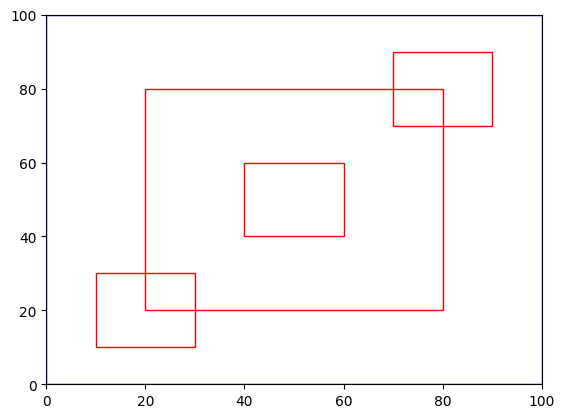

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


class QuadTreeNode:
    def __init__(self, bounds, level=0):
        self.level = level
        self.bounds = bounds
        self.children = [None, None, None, None]  # NW, NE, SW, SE
        self.polygons = []

    def insert(self, polygon_id, polygon):
        if not self.in_bounds(polygon.get_bounds()):
            return False

        if len(self.polygons) < 4:  # If there's space, insert the polygon here
            self.polygons.append((polygon_id, polygon))
            return True

        # If the node is a leaf, split it into four children
        if all(child is None for child in self.children):
            self.split()

        # Recursively insert the polygon into one of the children
        for i in range(4):
            if self.children[i].insert(polygon_id, polygon):
                return True
    
    def remove(self, polygon_id):
        # Remove the polygon with the specified ID from the node
        self.polygons = [polygon for polygon in self.polygons if polygon[0] != polygon_id]

        """
        print(f'Polygons at level {self.level}:')
        for polygon in self.polygons:
            print(f'\t{polygon}')
        """

        # Recursively remove the polygon from the children
        for child in self.children:
            if child is not None:
                child.remove(polygon_id)

    def query_region(self, query_bounds):
        result = []

        # Check if the node's bounds intersect with the query region
        if not self.in_bounds(query_bounds):
            return result

        # Add IDs of polygons in the node that intersect with the query region
        for polygon_id, polygon in self.polygons:
            if self.intersects(polygon.get_bounds(), query_bounds):
                result.append(polygon_id)

        # Recursively query the children
        for child in self.children:
            if child is not None:
                result.extend(child.query_region(query_bounds))

        return result

    def in_bounds(self, polygon_bounds):
        min_x, min_y, max_x, max_y = self.bounds
        p_min_x, p_min_y, p_max_x, p_max_y = polygon_bounds
        return not (p_max_x < min_x or p_min_x > max_x or p_max_y < min_y or p_min_y > max_y)

    def split(self):
        min_x, min_y, max_x, max_y = self.bounds
        mid_x, mid_y = (min_x + max_x) / 2, (min_y + max_y) / 2

        self.children[0] = QuadTreeNode((mid_x, mid_y, max_x, max_y), self.level+1)  # NW
        self.children[1] = QuadTreeNode((min_x, mid_y, mid_x, max_y), self.level+1)  # NE
        self.children[2] = QuadTreeNode((min_x, min_y, mid_x, mid_y), self.level+1)  # SW
        self.children[3] = QuadTreeNode((mid_x, min_y, max_x, mid_y), self.level+1)  # SE

        # Reallocate polygons to children
        for polygon_id, polygon in self.polygons:
            for child in self.children:
                if child.in_bounds(polygon.get_bounds()):
                    child.insert(polygon_id, polygon)
                    break

        self.polygons = []  # Clear polygons from the current node

    @staticmethod
    def intersects(bounds1, bounds2):
        min_x1, min_y1, max_x1, max_y1 = bounds1
        min_x2, min_y2, max_x2, max_y2 = bounds2

        return not (max_x1 < min_x2 or min_x1 > max_x2 or max_y1 < min_y2 or min_y1 > max_y2)

    def draw(self, ax):
        min_x, min_y, max_x, max_y = self.bounds
        rect = patches.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

        for child in self.children:
            if child is not None:
                child.draw(ax)

        for polygon_id, polygon in self.polygons:
            p_min_x, p_min_y, p_max_x, p_max_y = polygon.get_bounds()
            rect = patches.Rectangle((p_min_x, p_min_y), p_max_x - p_min_x, p_max_y - p_min_y, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

class QuadTree:
    def __init__(self, bounds):
        self.root = QuadTreeNode(bounds)

    def insert(self, polygon_id, polygon):
        return self.root.insert(polygon_id, polygon)
    
    def remove(self, polygon_id):
        # Remove the polygon from the quad tree starting from the root
        self.root.remove(polygon_id)
    
    def query_region(self, query_bounds):
        # Query the quad tree starting from the root
        return self.root.query_region(query_bounds)

    def draw(self):
        fig, ax = plt.subplots()
        ax.set_xlim(self.root.bounds[0], self.root.bounds[2])
        ax.set_ylim(self.root.bounds[1], self.root.bounds[3])
        self.root.draw(ax)
        plt.show()

# Example usage:
if __name__ == "__main__":
    quad_tree_bounds = (0, 0, 100, 100)
    quad_tree = QuadTree(quad_tree_bounds)

    # Example polygons with IDs
    polygons = [
        (1, Polygon([Point(10, 10), Point(10, 30), Point(30, 30), Point(30, 10)])),
        (2, Polygon([Point(40, 40), Point(40, 60), Point(60, 60), Point(60, 40)])),
        (3, Polygon([Point(70, 70), Point(70, 90), Point(90, 90), Point(90, 70)])),
        (4, Polygon([Point(20, 20), Point(20, 80), Point(80, 80), Point(80, 20)]))
    ]

    # Insert polygons into the quad tree
    for polygon_id, polygon_bounds in polygons:
        quad_tree.insert(polygon_id, polygon_bounds)

    # Draw the quad tree
    quad_tree.draw()

Polygons at level 0:
	(1, Polygon(points=[Point(x=10, y=10), Point(x=10, y=30), Point(x=30, y=30), Point(x=30, y=10)]))
	(3, Polygon(points=[Point(x=70, y=70), Point(x=70, y=90), Point(x=90, y=90), Point(x=90, y=70)]))
	(4, Polygon(points=[Point(x=20, y=20), Point(x=20, y=80), Point(x=80, y=80), Point(x=80, y=20)]))


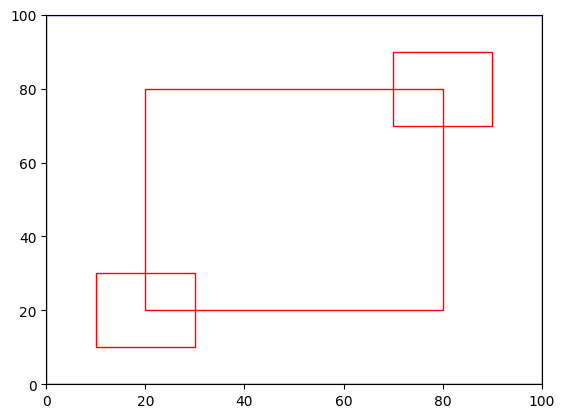

In [7]:
quad_tree.remove(2)
quad_tree.draw()

In [8]:
# Query region (50, 50, 80, 80) and print the result
query_bounds = (50, 50, 80, 80)
result = quad_tree.query_region(query_bounds)
print("Polygons intersecting the region:", result)

Polygons intersecting the region: [3, 4]
